# <font color='purple'> Homework 4</font>

------
### Information
**Name:** Ahmed Ibrahim

**Student Number:** 261032796

**Date:** 2022-02-15

**Course Number:** YCBS 258 - Practical Machine Learning

------
1. Download and explore data
2. Preproceess data if needed
3. Create a dataset with group of inputs of some size (between 10 and 50)
4. Split the data into train and test
5. Use 3 different RNN types

## Starter Code

In [1]:
!wget https://storage.googleapis.com/nicksdemobucket/sunspots.csv

# OR

!wget https://storage.googleapis.com/nicksdemobucket/temperatures.csv

# OR MNIST

--2022-02-17 04:38:17--  https://storage.googleapis.com/nicksdemobucket/sunspots.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.98.128, 142.250.97.128, 142.251.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45039 (44K) [application/octet-stream]
Saving to: ‘sunspots.csv’

sunspots.csv        100%[===================>]  43.98K  --.-KB/s    in 0s      

2022-02-17 04:38:17 (113 MB/s) - ‘sunspots.csv’ saved [45039/45039]

--2022-02-17 04:38:17--  https://storage.googleapis.com/nicksdemobucket/temperatures.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.98.128, 142.250.97.128, 142.251.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/csv]
Saving to: ‘temperatures.csv’

temperatures.csv    100%[=

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('sunspots.csv')

df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


## Data Mining

In [3]:
# Check if running in colab.
import sys
print ('Running in colab:', 'google.colab' in sys.modules)

Running in colab: True


In [4]:
# Check connection to a GPU.
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu Feb 17 04:38:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
# Check RAM runtime.
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [6]:
# Check CPU specs.
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              4
On-line CPU(s) list: 0-3
Thread(s) per core:  2
Core(s) per socket:  2
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2299.998
BogoMIPS:            4599.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0-3
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs 

In [7]:
import numpy as np
import pandas as pd

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#from sklearn.preprocessing import MinMaxScaler

In [10]:
import random
random.seed(12)

In [11]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Dense, TimeDistributed, GRU, Conv1D

In [12]:
# Get Temperature dataset.
!wget https://storage.googleapis.com/nicksdemobucket/temperatures.csv

--2022-02-17 04:38:20--  https://storage.googleapis.com/nicksdemobucket/temperatures.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 172.253.123.128, 142.250.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/csv]
Saving to: ‘temperatures.csv.1’

temperatures.csv.1  100%[===================>]  66.33K  --.-KB/s    in 0.001s  

2022-02-17 04:38:20 (102 MB/s) - ‘temperatures.csv.1’ saved [67921/67921]



In [13]:
temp_df = pd.read_csv('temperatures.csv')

## Data Exploration

In [14]:
# Check general description of dataframe.
temp_df.describe(include = 'all')

,Date,Temp
count,3650,3650.000000
unique,3650,NaN
top,1981-01-01,NaN
freq,1,NaN
mean,NaN,11.177753
std,NaN,4.071837
min,NaN,0.000000
25%,NaN,8.300000
50%,NaN,11.000000
75%,NaN,14.000000


In [15]:
# Check data type of columns.
temp_df.dtypes

Date     object
Temp    float64
dtype: object

In [16]:
# Check first twelve values.
temp_df.head(12)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
5,1981-01-06,15.8
6,1981-01-07,15.8
7,1981-01-08,17.4
8,1981-01-09,21.8
9,1981-01-10,20.0


In [17]:
# Check last twelve values.
temp_df.tail(12)

,Date,Temp
3638,1990-12-20,15.4
3639,1990-12-21,13.1
3640,1990-12-22,13.2
3641,1990-12-23,13.9
3642,1990-12-24,10.0
3643,1990-12-25,12.9
3644,1990-12-26,14.6
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5


In [18]:
# Check total number of nulls in entire dataframe.
temp_df.isnull().sum().sum()

0

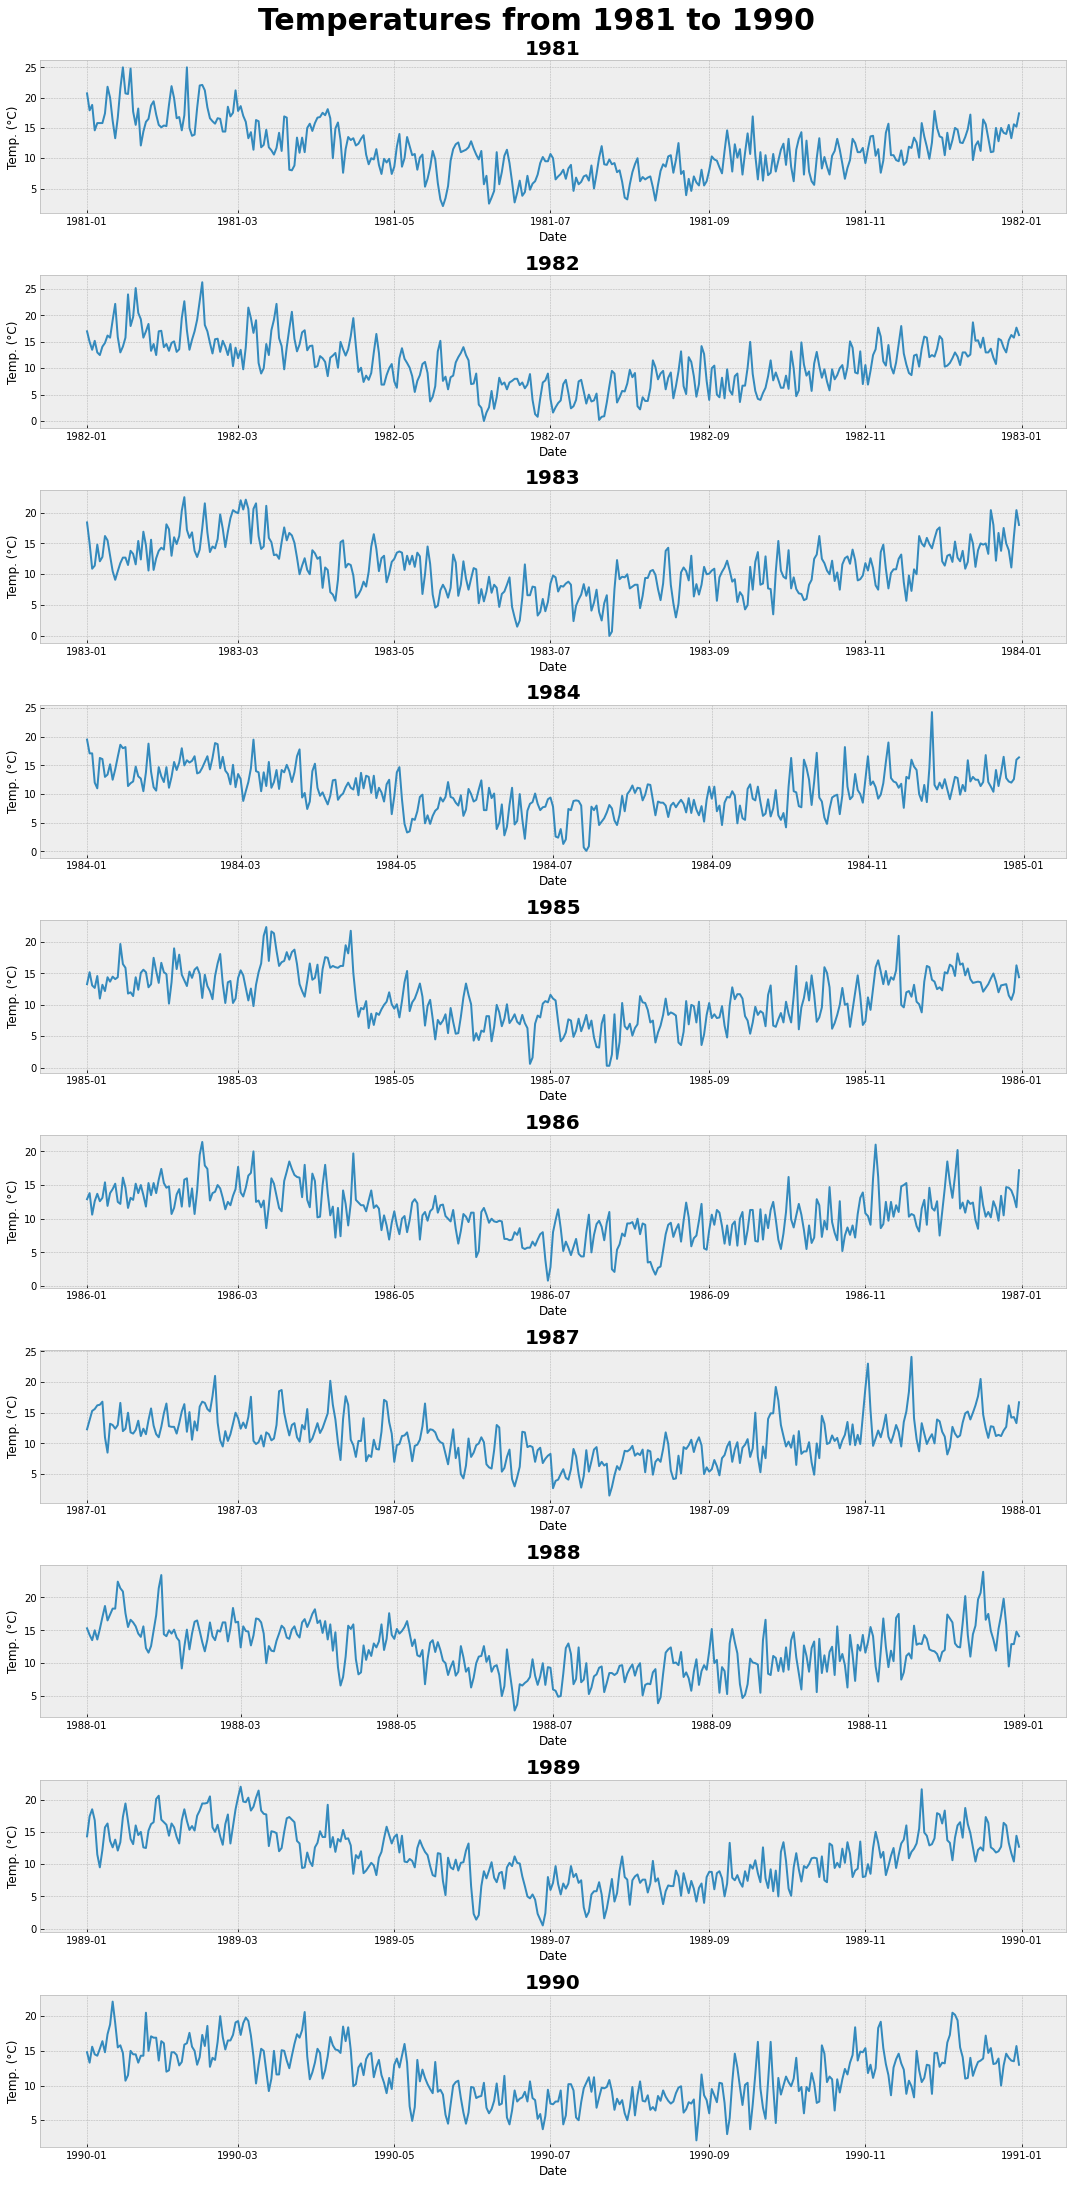

In [19]:
# Generate timeseries subplots for each year.
plt.style.use('bmh')
fig, axs = plt.subplots(10, figsize = (15, 30))
fig.suptitle('Temperatures from 1981 to 1990', y = 1.01, fontsize = 30, fontweight = "bold", ha = "center")
for year in range(1981, 1990 + 1):
    index = year - 1981
    start_index = index*365
    end_index = start_index + 365
    temp_df_given_year = temp_df.iloc[start_index:end_index, 0:2]
    temp_df_given_year['Date'] = pd.to_datetime(temp_df_given_year['Date'])
    axs[index].plot(temp_df_given_year['Date'],
                    temp_df_given_year['Temp'])
    axs[index].set_title(year, size = 20, fontweight = "bold")
for ax in axs.flat:
        ax.set(xlabel = 'Date', ylabel = 'Temp.' + ' (\N{DEGREE SIGN}C)')
fig.tight_layout()
fig.show();  

### Summary Data Exploration
*   The dataset contains 10 years worth of temperature measurements.
*   It contains 3650 unique dates with a temperature stored as a float.
*   The average temperature is 11.18 <span>&#177;</span> 4.07 °C
*   No duplicate dates were found.
*   No nulls/NaN values were found in the dataframe.
*   10 Times series subplots were generated for each year in the dataset. 

## Data Cleaning & Preparation

In [20]:
# Format date and make it index.
temp_df['Date'] = pd.to_datetime(temp_df['Date'])
temp_df_index = temp_df.set_index('Date')
temp_df_index.head(12)

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
1981-01-06,15.8
1981-01-07,15.8
1981-01-08,17.4
1981-01-09,21.8


In [21]:
# Function for sliding window.
def sliding_window(dataframe, size):
    for s in range(1, (size + 1)):
        dataframe['shift_{}'.format(s)] = dataframe['Temp'].shift(s)
    return dataframe

In [22]:
# Choose size for group of inputs (between 10 and 50).
# size_group_inputs = random.randint(10, 50)
size_group_inputs = 12
print(f'Size for group of inputs: {size_group_inputs}.')

Size for group of inputs: 12.


In [23]:
# Format sliding for 'temp_df'.
temp_df_slided = sliding_window(temp_df_index, size_group_inputs)
temp_df_slided

,Temp,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Date,,,,,,,,,,,,,
1981-01-01,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-02,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-03,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-04,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-05,15.8,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-12-27,14.0,14.6,12.9,10.0,13.9,13.2,13.1,15.4,14.7,17.2,13.9,13.6,13.4
1990-12-28,13.6,14.0,14.6,12.9,10.0,13.9,13.2,13.1,15.4,14.7,17.2,13.9,13.6
1990-12-29,13.5,13.6,14.0,14.6,12.9,10.0,13.9,13.2,13.1,15.4,14.7,17.2,13.9


In [24]:
# Drop NaN values.
temp_df_slided.dropna(inplace = True)
temp_df_slided

,Temp,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Date,,,,,,,,,,,,,
1981-01-13,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6,18.8,17.9,20.7
1981-01-14,21.5,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6,18.8,17.9
1981-01-15,25.0,21.5,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6,18.8
1981-01-16,20.7,25.0,21.5,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6
1981-01-17,20.6,20.7,25.0,21.5,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-12-27,14.0,14.6,12.9,10.0,13.9,13.2,13.1,15.4,14.7,17.2,13.9,13.6,13.4
1990-12-28,13.6,14.0,14.6,12.9,10.0,13.9,13.2,13.1,15.4,14.7,17.2,13.9,13.6
1990-12-29,13.5,13.6,14.0,14.6,12.9,10.0,13.9,13.2,13.1,15.4,14.7,17.2,13.9


In [25]:
# Split data into training, validation and testing.
split_point_date_1 = pd.Timestamp('01-01-1987')
split_point_date_2 = pd.Timestamp('01-01-1989')

temp_df_train = temp_df_slided.loc[:split_point_date_1, ]
temp_df_valid = temp_df_slided.loc[split_point_date_1:split_point_date_2, ]
temp_df_test = temp_df_slided.loc[split_point_date_2: ]

temp_df_train.shape, temp_df_valid.shape, temp_df_test.shape

((2179, 13), (731, 13), (730, 13))

In [26]:
# Setup X_train, y_train, X_valid, y_valid, X_test, y_test.
X_train = temp_df_train.drop('Temp', axis = 1)
X_valid = temp_df_valid.drop('Temp', axis = 1)
X_test = temp_df_test.drop('Temp', axis = 1)


y_train = temp_df_train[['Temp']]
y_valid = temp_df_valid[['Temp']]
y_test = temp_df_test[['Temp']]

X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((2179, 12), (731, 12), (730, 12), (2179, 1), (731, 1), (730, 1))

In [27]:
# Convert dataframes to numpy arrays.
X_train_np = X_train.values
X_valid_np = X_valid.values
X_test_np = X_test.values

y_train_np = y_train.values
y_valid_np = y_valid.values
y_test_np = y_test.values

X_train_np.shape, X_valid_np.shape, X_test_np.shape, y_train_np.shape, y_valid_np.shape, y_test_np.shape

((2179, 12), (731, 12), (730, 12), (2179, 1), (731, 1), (730, 1))

In [28]:
# Reshape X_train and X_test.
X_train_reshaped = X_train_np.reshape(X_train_np.shape[0], size_group_inputs, 1)
X_valid_reshaped = X_valid_np.reshape(X_valid_np.shape[0], size_group_inputs, 1)
X_test_reshaped = X_test_np.reshape(X_test_np.shape[0], size_group_inputs, 1)
X_train_reshaped.shape, X_valid_reshaped.shape, X_test_reshaped.shape

((2179, 12, 1), (731, 12, 1), (730, 12, 1))

## Predictive Modeling & Data Visualization

### Deep RNNs

In [29]:
# Model for Deep RNNs
K.clear_session()

model_Deep_RNNs = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences = True, input_shape = [None, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.SimpleRNN(20, return_sequences = True),
    keras.layers.BatchNormalization(),
    keras.layers.TimeDistributed(keras.layers.Dense(1))
])

model_Deep_RNNs.summary()
model_Deep_RNNs.compile(loss = "mse", optimizer = "adam")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 20)          440       
                                                                 
 batch_normalization (BatchN  (None, None, 20)         80        
 ormalization)                                                   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 20)          820       
                                                                 
 batch_normalization_1 (Batc  (None, None, 20)         80        
 hNormalization)                                                 
                                                                 
 time_distributed (TimeDistr  (None, None, 1)          21        
 ibuted)                                                         
                                                        

In [30]:
# Run Deep RNNs model.
history_Deep_RNNs = model_Deep_RNNs.fit(X_train_reshaped, y_train_np, epochs = 20,
                    validation_data = (X_valid_np, y_valid))

Epoch 1/20
69/69 [==============================] - 6s 24ms/step - loss: 128.1358 - val_loss: 104.9109
Epoch 2/20
69/69 [==============================] - 1s 19ms/step - loss: 113.6151 - val_loss: 80.0728
Epoch 3/20
69/69 [==============================] - 1s 19ms/step - loss: 95.9817 - val_loss: 58.6085
Epoch 4/20
69/69 [==============================] - 1s 19ms/step - loss: 74.6439 - val_loss: 42.4796
Epoch 5/20
69/69 [==============================] - 1s 19ms/step - loss: 52.3063 - val_loss: 30.7695
Epoch 6/20
69/69 [==============================] - 1s 19ms/step - loss: 33.1203 - val_loss: 19.0490
Epoch 7/20
69/69 [==============================] - 1s 19ms/step - loss: 19.7379 - val_loss: 14.9715
Epoch 8/20
69/69 [==============================] - 1s 19ms/step - loss: 11.9742 - val_loss: 7.4649
Epoch 9/20
69/69 [==============================] - 1s 19ms/step - loss: 8.4994 - val_loss: 6.6112
Epoch 10/20
69/69 [==============================] - 1s 19ms/step - loss: 7.4310 - val_loss

In [31]:
# Get Deep RNNs predictions.
y_pred_Deep_RNNs = model_Deep_RNNs.predict(X_test_np)[:, -1][..., np.newaxis]
y_pred_Deep_RNNs_reshaped = np.reshape(y_pred_Deep_RNNs, (730,1))

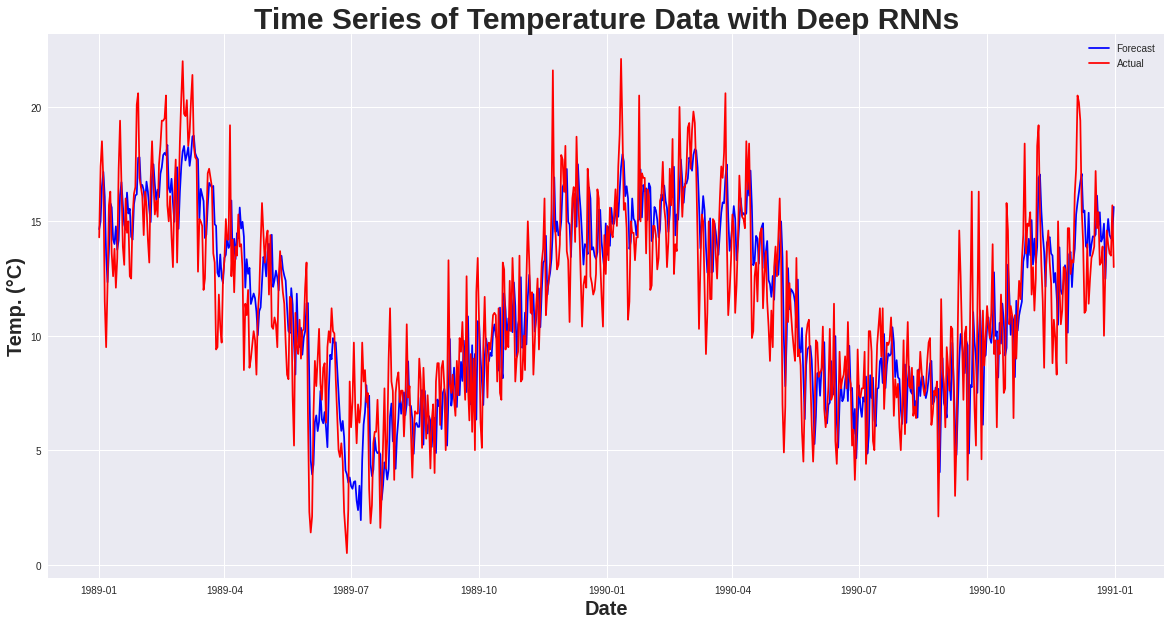

In [61]:
# Plot forecast vs actual for Deep RNNs.
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(X_test.index, y_pred_Deep_RNNs_reshaped, 'b', label = 'Forecast')
plt.plot(X_test.index, y_test_np, 'r', label = 'Actual')
plt.xlabel('Date', fontsize = 20, fontweight = "bold", ha = "center")
plt.ylabel('Temp.' + ' (\N{DEGREE SIGN}C)', fontsize = 20, fontweight = "bold", ha = "center")
plt.legend()
plt.title('Time Series of Temperature Data with Deep RNNs', fontsize = 30, fontweight = "bold", ha = "center")
plt.show();

### LSTMs

In [33]:
# LSTM Model.
K.clear_session()

model_LSTM = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences = True, input_shape = [None, 1]),
    keras.layers.LSTM(100, return_sequences = True),
    keras.layers.TimeDistributed(keras.layers.Dense(1))
])

model_LSTM.summary()
model_LSTM.compile(loss = "mse", optimizer = "adam")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 100)         40800     
                                                                 
 lstm_1 (LSTM)               (None, None, 100)         80400     
                                                                 
 time_distributed (TimeDistr  (None, None, 1)          101       
 ibuted)                                                         
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Run LSTM model.
history_LSTM = model_LSTM.fit(X_train_reshaped, y_train_np, epochs = 20, validation_data = (X_valid_reshaped, y_valid_np))

Epoch 1/20
69/69 [==============================] - 5s 19ms/step - loss: 39.1720 - val_loss: 19.4806
Epoch 2/20
69/69 [==============================] - 0s 5ms/step - loss: 17.8921 - val_loss: 12.2117
Epoch 3/20
69/69 [==============================] - 0s 5ms/step - loss: 11.5823 - val_loss: 9.4799
Epoch 4/20
69/69 [==============================] - 0s 5ms/step - loss: 9.5833 - val_loss: 8.3967
Epoch 5/20
69/69 [==============================] - 0s 7ms/step - loss: 8.6896 - val_loss: 7.7167
Epoch 6/20
69/69 [==============================] - 1s 9ms/step - loss: 7.9342 - val_loss: 7.3904
Epoch 7/20
69/69 [==============================] - 1s 8ms/step - loss: 7.4760 - val_loss: 7.2377
Epoch 8/20
69/69 [==============================] - 0s 7ms/step - loss: 7.3425 - val_loss: 6.6336
Epoch 9/20
69/69 [==============================] - 0s 7ms/step - loss: 7.1635 - val_loss: 6.5006
Epoch 10/20
69/69 [==============================] - 0s 5ms/step - loss: 7.1249 - val_loss: 6.7309
Epoch 11/20
6

In [35]:
# Get LSTM predictions.
y_pred_LSTM = model_LSTM.predict(X_test_np)[:, -1][..., np.newaxis]
y_pred_LSTM_reshaped = np.reshape(y_pred_LSTM, (730,1))

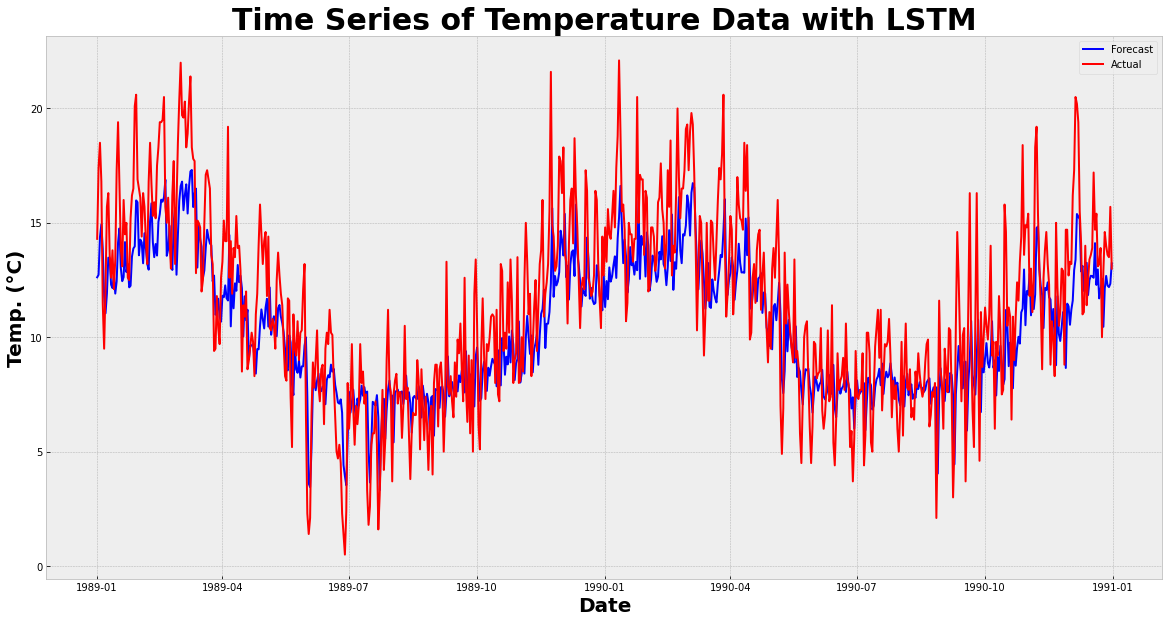

In [36]:
# Plot forecast vs actual for LSTM.
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(X_test.index, y_pred_LSTM_reshaped, 'b', label = 'Forecast')
plt.plot(X_test.index, y_test_np, 'r', label = 'Actual')
plt.xlabel('Date', fontsize = 20, fontweight = "bold", ha = "center")
plt.ylabel('Temp.' + ' (\N{DEGREE SIGN}C)', fontsize = 20, fontweight = "bold", ha = "center")
plt.legend()
plt.title('Time Series of Temperature Data with LSTM', fontsize = 30, fontweight = "bold", ha = "center")
plt.show();

### GRU with Convolution Layer

In [37]:
# Model for GRU with Convolution layer
K.clear_session()

model_GRU_conv = keras.models.Sequential([
    keras.layers.Conv1D(filters = 100, kernel_size = 4, strides = 2, padding = "valid",
                        input_shape = [None, 1]),
    keras.layers.GRU(100, return_sequences = True),
    keras.layers.GRU(100, return_sequences = True),
    keras.layers.TimeDistributed(keras.layers.Dense(1))
])

model_GRU_conv.summary()
model_GRU_conv.compile(loss = "mse", optimizer = "adam")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 100)         500       
                                                                 
 gru (GRU)                   (None, None, 100)         60600     
                                                                 
 gru_1 (GRU)                 (None, None, 100)         60600     
                                                                 
 time_distributed (TimeDistr  (None, None, 1)          101       
 ibuted)                                                         
                                                                 
Total params: 121,801
Trainable params: 121,801
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Run GRU_conv model.
history_GRU_conv = model_GRU_conv.fit(X_train_reshaped, y_train_np, epochs = 20,
                    validation_data = (X_valid_reshaped, y_valid))

Epoch 1/20
69/69 [==============================] - 9s 19ms/step - loss: 25.9166 - val_loss: 11.6811
Epoch 2/20
69/69 [==============================] - 0s 7ms/step - loss: 11.3197 - val_loss: 8.2771
Epoch 3/20
69/69 [==============================] - 1s 7ms/step - loss: 8.3017 - val_loss: 7.5053
Epoch 4/20
69/69 [==============================] - 1s 8ms/step - loss: 7.2795 - val_loss: 6.4295
Epoch 5/20
69/69 [==============================] - 1s 8ms/step - loss: 7.0160 - val_loss: 6.6170
Epoch 6/20
69/69 [==============================] - 1s 8ms/step - loss: 6.8742 - val_loss: 7.9659
Epoch 7/20
69/69 [==============================] - 0s 7ms/step - loss: 6.7987 - val_loss: 6.1333
Epoch 8/20
69/69 [==============================] - 1s 8ms/step - loss: 6.9657 - val_loss: 6.1638
Epoch 9/20
69/69 [==============================] - 1s 8ms/step - loss: 6.6976 - val_loss: 6.0762
Epoch 10/20
69/69 [==============================] - 0s 5ms/step - loss: 6.4908 - val_loss: 6.0162
Epoch 11/20
69/

In [39]:
# Get GRU_conv predictions.
y_pred_GRU_conv = model_GRU_conv.predict(X_test_np)[:, -1][..., np.newaxis]
y_pred_GRU_conv_reshaped = np.reshape(y_pred_GRU_conv, (730,1))

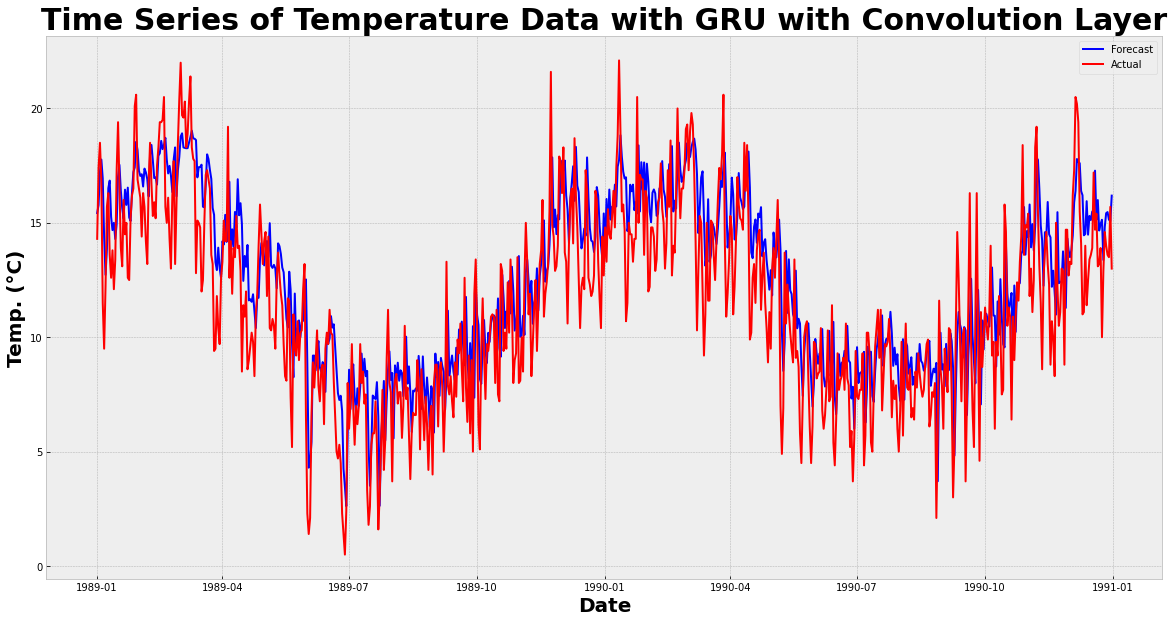

In [40]:
# Plot forecast vs actual for LSTM.
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(X_test.index, y_pred_GRU_conv_reshaped, 'b', label = 'Forecast')
plt.plot(X_test.index, y_test_np, 'r', label = 'Actual')
plt.xlabel('Date', fontsize = 20, fontweight = "bold", ha = "center")
plt.ylabel('Temp.' + ' (\N{DEGREE SIGN}C)', fontsize = 20, fontweight = "bold", ha = "center")
plt.legend()
plt.title('Time Series of Temperature Data with GRU with Convolution Layer', fontsize = 30, fontweight = "bold", ha = "center")
plt.show();